In [166]:
from env import username, host, password
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pydataset import data
import matplotlib

##  Use the iris database to answer the following quesitons:

In [4]:
#function that creates url for connecting to SQL server
def get_db_url(user, pw, h, db_name):
    #create string for url
    url = f'mysql+pymysql://{user}:{pw}@{h}/{db_name}'
    #return url
    return url

In [5]:
iris_url = get_db_url(username, password, host, 'iris_db')

In [206]:
iris_df = pd.read_sql('SELECT * FROM measurements as m JOIN species AS s ON m.species_id = s.species_id', iris_url)

### What does the distribution of petal lengths look like?

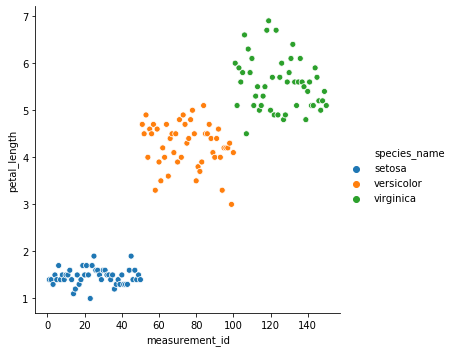

In [211]:
sns.relplot(x='measurement_id', y='petal_length', hue='species_name',data=iris_df)

### Is there a correlation between petal length and petal width?

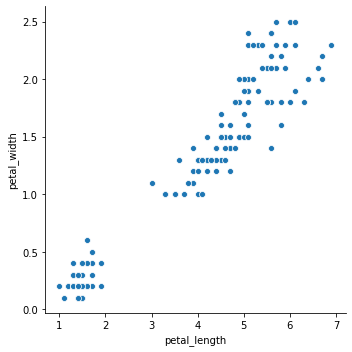

In [208]:
sns.relplot(x='petal_length', y='petal_width', data=iris_df)

It seems that as petal length goes up the petal width will also go up meaning they are correlated.

### Would it be reasonable to predict species based on sepal width and sepal length?

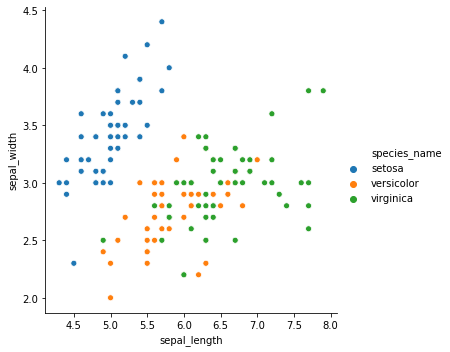

In [209]:
sns.relplot(x='sepal_length', y='sepal_width', hue='species_name', data=iris_df)

In [ ]:
# For the most part sepal length/width is not a reliable way to predict species. 
# However it seems for species id 1 you might be able to identify it by a wider sepal 
# while also having a shorter sepal.

### Which features would be best used to predict species?

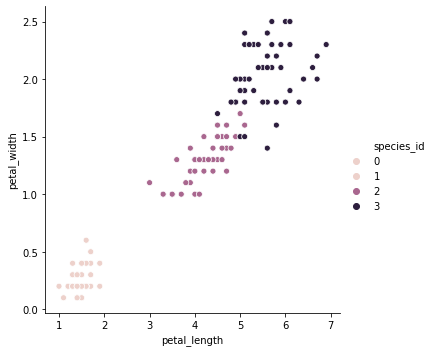

In [20]:
sns.relplot(x='petal_length', y='petal_width', hue='species_id', data=iris_df)

In [21]:
# I believe that petal length and width is a viable way to predict species.
# The much shorter and wider petals belong to species 1
# The longest and widest petals belong to species 3
# If there are petals in the middle it's more likely to belong to species 2

### 1. Using the lesson as an example, use seaborn's load_dataset function to load the anscombe data set. Use pandas to group the data by the dataset column, and calculate summary statistics for each dataset. What do you notice?

### Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

In [30]:
anscombe = sns.load_dataset('anscombe')

In [41]:
ans_group = anscombe.groupby('dataset').describe()
ans_group

x                                               y            \
        count mean       std  min  25%  50%   75%   max count      mean   
dataset                                                                   
I        11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
II       11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500909   
III      11.0  9.0  3.316625  4.0  6.5  9.0  11.5  14.0  11.0  7.500000   
IV       11.0  9.0  3.316625  8.0  8.0  8.0   8.0  19.0  11.0  7.500909   

                                                   
              std   min    25%   50%   75%    max  
dataset                                            
I        2.031568  4.26  6.315  7.58  8.57  10.84  
II       2.031657  3.10  6.695  8.14  8.95   9.26  
III      2.030424  5.39  6.250  7.11  7.98  12.74  
IV       2.030579  5.25  6.170  7.04  8.19  12.50

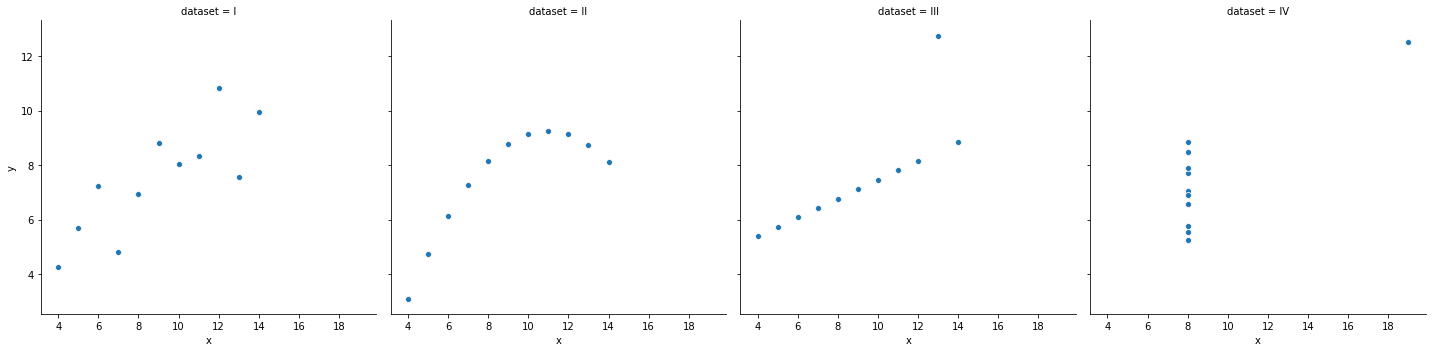

In [45]:
sns.relplot(x='x', y='y', col = 'dataset', data=anscombe)

### 2. Load the InsectSprays dataset and read it's documentation. Create a boxplot that shows the effectiveness of the different insect sprays.

In [56]:
ins_sprays = data('InsectSprays')

In [57]:
data('InsectSprays', show_doc=True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [55]:
ins_sprays

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


Text(0.5, 1.0, 'Effectivness of Spray Types and Number of Insects Left')

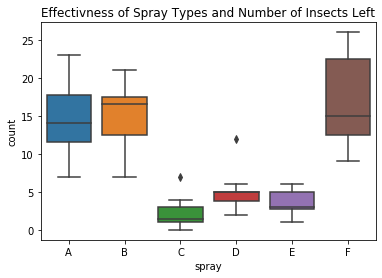

In [194]:
sns.boxplot(data=ins_sprays, x='spray', y='count')
plt.title("Effectivness of Spray Types and Number of Insects Left")

### 3. Load the swiss dataset and read it's documentation. Create visualizations to answer the following questions:

In [62]:
swiss = data('swiss')

In [63]:
data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

In [64]:
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Courtelary,80.2,17.0,15,12,9.96,22.2
Delemont,83.1,45.1,6,9,84.84,22.2
Franches-Mnt,92.5,39.7,5,5,93.40,20.2
Moutier,85.8,36.5,12,7,33.77,20.3
Neuveville,76.9,43.5,17,15,5.16,20.6
Porrentruy,76.1,35.3,9,7,90.57,26.6
Broye,83.8,70.2,16,7,92.85,23.6
Glane,92.4,67.8,14,8,97.16,24.9
Gruyere,82.4,53.3,12,7,97.67,21.0
Sarine,82.9,45.2,16,13,91.38,24.4


### 3-1 Create an attribute named is_catholic that holds a boolean value of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)

In [67]:
swiss['is_catholic'] = swiss['Catholic'] > 50
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


### 3-2 Does whether or not a province is Catholic influence fertility?

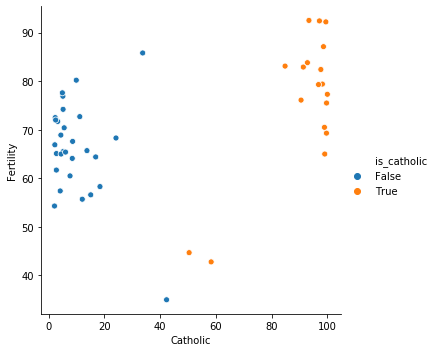

In [75]:
sns.relplot(x='Catholic', y='Fertility', hue='is_catholic', data=swiss)

### 3-3 What measure correlates most strongly with fertility?

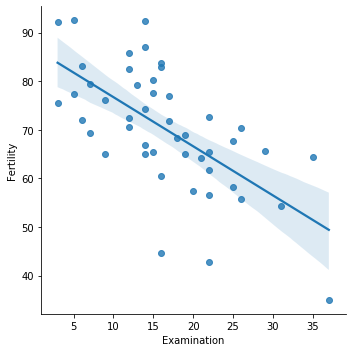

In [100]:
sns.lmplot(x='Examination', y='Fertility', data=swiss)

In [97]:
# Examination and Fertility seems to be the most strongly correlated with the smallest confidence interval

### 4. Using the chipotle dataset from the previous exercise, create a bar chart that shows the 4 most popular items and the revenue produced by each.

In [101]:
chip_url = get_db_url(username, password, host, 'chipotle')

In [102]:
chipotle = pd.read_sql('SELECT * FROM orders', chip_url)

In [107]:
price_float = chipotle.assign(float_price = chipotle['item_price'].str.replace('$', '').astype(float))

In [115]:
#create item_counts table by grouping item_name on chipotle and suming each items quantity
item_counts = chipotle.groupby('item_name').quantity.agg('sum')
#sort the values in descending order and use .head(3) to only get back the top 3
item_revenue = price_float.groupby('item_name').float_price.agg('sum')

In [118]:
revenue_count = pd.merge(item_counts, item_revenue, left_on='item_name', right_on='item_name', suffixes=('item_count', 'item_revenue'))

In [123]:
top_four = revenue_count.sort_values('quantity', ascending=False).head(4)

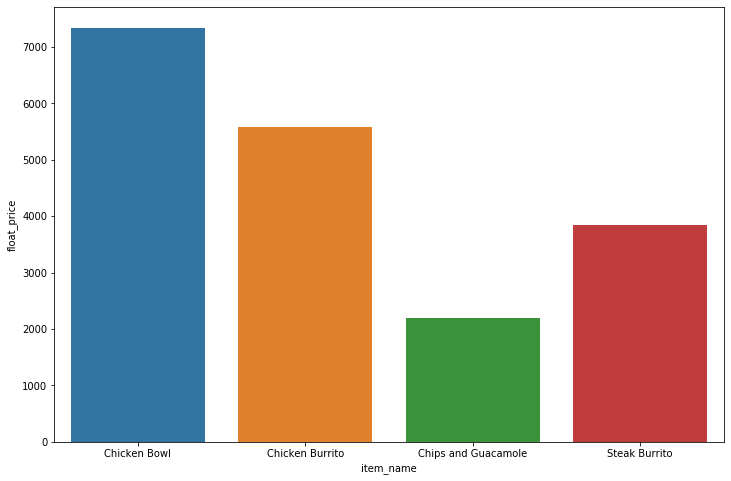

In [132]:
plt.figure(figsize=(12,8))
sns.barplot(x=top_four.index, y='float_price', data=top_four)

### 5. Load the sleepstudy data and read it's documentation. Use seaborn to create a line chart of all the individual subject's reaction times and a more prominant line showing the average change in reaction time.

In [133]:
#load the sleepstudy data under variable 'sleepstudy'
sleepstudy = data('sleepstudy')

In [137]:
#read documentation for sleepstudy
data('sleepstudy', show_doc=True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [164]:
#find the average reaction time for a given day
avg_reactions = sleepstudy.groupby('Days').Reaction.agg('mean')
#convert the series into a dataframe
avg_reactions = pd.DataFrame(avg_reactions)

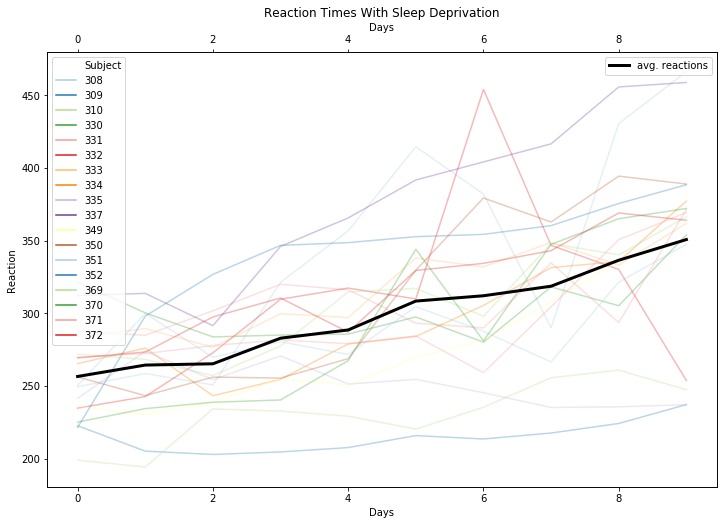

In [202]:
#set figure size
fig, ax1 = plt.subplots(figsize=(12,8))
#set title for graph
ax1.set_title('Reaction Times With Sleep Deprivation')
#set x axis label
ax1.set_xlabel('Days')
#set y axis label
ax1.set_ylabel('Reaction Times')
#graph every subjects average reaction time for each day while giving it different colors and making it opaque
ax1 = sns.lineplot('Days', 'Reaction', hue='Subject', data=sleepstudy, palette='Paired', alpha=.3)
#use twiny to create a duplicate axis for the second lineplot
ax2 = ax1.twiny()
#graph the average of every subjects reaction times for the day leaving it dark for comparison
ax2 = sns.lineplot(x=avg_reactions.index, y=avg_reactions.Reaction, color = 'black',
                   label='avg. reactions', linewidth = 3, data=avg_reactions)
#set location of the legend to upper right to keep them seperate
ax2.legend(loc='upper right')